# Do first babies arrive late?

This notebook is for:

* Chapter 1 (Statistical Thinking for Programmers) 
* Chapter 2 (Descriptive Statistics) 

of [Think Stats - Probability and Statistics for Programmers](http://greenteapress.com/thinkstats/) by Allen B Downey.

Objective is to answer the question in title above using the tools of statistics, which are:

* Data collection
* Descriptive Statistics
* Exploratory Data Analysis
* Hypothesis Testing
* Estimation

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Chapter 1 - Statistical Thinking

### Data Collection

Data is from National Survey of Family Growth (NSFG) initiative of the US Centers for Disease Control (CDC). NSFG is a __cross-sectional study__, not a __longitudinal one__. Data was [downloaded from here](http://greenteapress.com/thinkstats/nsfg.html).

I used information from survey.py::Pregnancies::GetFields method to specify the colspecs in the read_fwf function below.

In [2]:
f_resp = open("2002FemResp.dat", 'rb')
nbr_resp = 0
for l_resp in f_resp:
    nbr_resp += 1
f_resp.close()
f_preg = open("2002FemPreg.dat", 'rb')
nbr_preg = 0
for l_preg in f_preg:
    nbr_preg += 1
f_preg.close()

print("# of respondents: %d" % (nbr_resp))
print("# of pregnancies: %d" % (nbr_preg))

# of respondents: 7643
# of pregnancies: 13593


In [3]:
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (57, 59),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
pregnancies.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,81.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,71.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,9.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,7.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,6.0,39,1,3.0,18.0,12999.542264


### Exploratory Analysis

Shows that about 9,000 of the 13,500 pregnancies here result in live births. Of these, the data is fairly evenly split between first baby and other babies.

Pregnancy lengths for first babies seem to be only slightly higher (0.078 weeks) than for other babies. Such a difference is called an __apparent effect__, ie, there might be something going on, but we are not sure.

In [4]:
live_births = pregnancies[pregnancies["outcome"] == 1]
print("# of live births: %d" % len(live_births))

# of live births: 9148


In [5]:
first_babies = live_births[live_births["birthord"] == 1]
other_babies = live_births[live_births["birthord"] != 1]
print("# first babies: %d" % len(first_babies))
print("# other babies: %d" % len(other_babies))

# first babies: 4413
# other babies: 4735


In [6]:
avg_prglen_first_baby = first_babies["prglength"].mean()
avg_prglen_other_baby = other_babies["prglength"].mean()
print("Average pregnancy length for first baby: %.3f weeks" % (avg_prglen_first_baby))
print("Average pregnancy length for other baby: %.3f weeks" % (avg_prglen_other_baby))
print("Difference: %.3f weeks" % (avg_prglen_first_baby - avg_prglen_other_baby))

Average pregnancy length for first baby: 38.601 weeks
Average pregnancy length for other baby: 38.523 weeks
Difference: 0.078 weeks


## Chapter 2 - Descriptive Statistics

### Distributions

Summary statistics - mean, variance, median, etc. Dangerous because they obscure the data. Alternative is to look at distributions of the data - describes how often each value appears.

Distributions are usually represented as histograms (raw frequencies binned into equally spaced buckets). Normalized histogram is called Probability Mass Function (PMF).

### Representing Distributions

In [7]:
prglen_first_babies = np.array(first_babies["prglength"])
prglen_other_babies = np.array(other_babies["prglength"])

# setting up range of histogram and number of bins
first_baby_min_prglen = np.min(prglen_first_babies)
first_baby_max_prglen = np.max(prglen_first_babies)
other_baby_min_prglen = np.min(prglen_other_babies)
other_baby_max_prglen = np.max(prglen_other_babies)
print("first baby preg length min: %d, max: %d" % 
      (first_baby_min_prglen, first_baby_max_prglen))
print("other baby preg length min: %d, max: %d" % 
      (other_baby_min_prglen, other_baby_max_prglen))

bin_lb = min([first_baby_min_prglen, other_baby_min_prglen])
bin_ub = max([first_baby_max_prglen, other_baby_max_prglen])
nbr_bins = bin_ub - bin_lb
bin_range = (bin_lb, bin_ub)
print("range:", bin_range, "#-bins:", nbr_bins)

# building the histograms
first_baby_fdist = np.histogram(np.array(prglen_first_babies), bins=nbr_bins, range=bin_range)
other_baby_fdist = np.histogram(np.array(prglen_other_babies), bins=nbr_bins, range=bin_range)

first baby preg length min: 0, max: 48
other baby preg length min: 4, max: 50
range: (0, 50) #-bins: 50


In [8]:
def mode(fdist):
    """ takes a histogram and returns the most frequent value """
    mode_idx = np.argmax(fdist[0])
    return fdist[1][mode_idx]

def all_modes(fdist):
    """ takes a histogram and returns (value, freq) pairs in desc freq """
    mode_idxs = np.argsort(fdist[0])[::-1]
    vf_pairs = []
    for i in range(mode_idxs.shape[0]):
        vf_pairs.append((int(fdist[1][mode_idxs[i]]), fdist[0][mode_idxs[i]]))
    return vf_pairs
    
print("First baby arrival top week (mode): %d" % (mode(first_baby_fdist)))
print("Other baby arrival top week (mode): %d" % (mode(other_baby_fdist)))

print("First baby top 5 frequent weeks:", all_modes(first_baby_fdist)[0:5])
print("Other baby top 5 frequent weeks:", all_modes(other_baby_fdist)[0:5])

First baby arrival top week (mode): 39
Other baby arrival top week (mode): 39
First baby top 5 frequent weeks: [(39, 2114), (40, 536), (41, 360), (38, 272), (37, 208)]
Other baby top 5 frequent weeks: [(39, 2579), (40, 580), (38, 335), (37, 247), (41, 227)]


### Plotting Histograms

From histogram below, it looks like until about week 41, other babies tend to arrive sooner in aggregate, but after that more first babies arrive. So there seems to be evidence that first babies do tend to arrive late.

Other information from the plot:

* Mode - most common week for arrival seems to be 39 weeks.
* Shape - distribution is assymetric around the mode, drops of quicker to right than left. Possible reason is because surgical intervention happens for late pregnancies.
* Outliers - babies born at 30 weeks are probably just unusual, but may also reflect reporting errors.

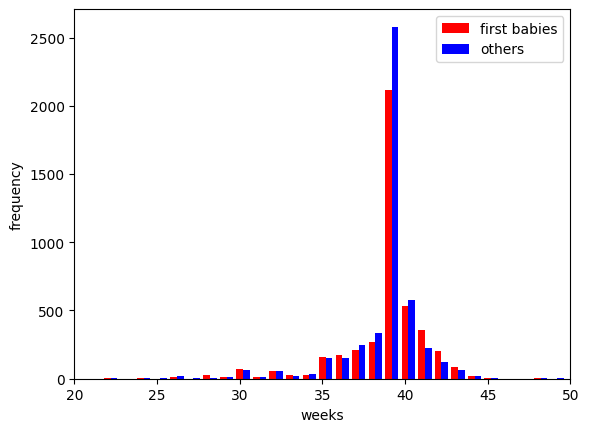

In [13]:
def draw_histogram(series1, series2, pmf=None):
    y1 = np.histogram(np.array(series1), bins=nbr_bins, range=bin_range, density=pmf)[0]
    y2 = np.histogram(np.array(series2), bins=nbr_bins, range=bin_range, density=pmf)[0]
    width = 0.4
    index = np.arange(nbr_bins)
    plt.bar(index, y1, width, color="red", label="first babies")
    plt.bar(index + width, y2, width, color="blue", label="others")
    plt.legend(loc="best")
    plt.xlim([20, 50])
    plt.xlabel("weeks")
    if pmf:
        plt.ylabel("probability")
    else:
        plt.ylabel("frequency")
    plt.show()
    
prglen_first_babies = first_babies["prglength"]
prglen_other_babies = other_babies["prglength"]
draw_histogram(prglen_first_babies, prglen_other_babies)

### Representing PMFs

PMFs normalize the raw frequencies by the population so they represent probabilities rather than frequency.

__NOTE__ - Exercise 2.4 on survival analysis moved to section on conditional probability.

We can get back the mean and standard deviation from the PMF as shown below.

In [25]:
def mean_from_pmf(pmf):
    """ takes a normalized histogram and returns the mean value """
    ps = pmf[0]
    xs = pmf[1][:-1]
    return np.dot(ps, xs)
    
def variance_from_pmf(pmf, mean):
    """ takes a normalized histogram and returns the variance """
    ps = pmf[0]
    xs = pmf[1][:-1]
    return np.dot(ps, np.power(xs - mean, 2))

pmf_first_babies = np.histogram(np.array(first_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)
pmf_other_babies = np.histogram(np.array(other_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)

mean_first_babies = mean_from_pmf(pmf_first_babies)
variance_first_babies = variance_from_pmf(pmf_first_babies, mean_first_babies)
mean_other_babies = mean_from_pmf(pmf_other_babies)
variance_other_babies = variance_from_pmf(pmf_other_babies, mean_other_babies)

print("first babies, mean: %.3f, variance: %.3f" % 
      (mean_first_babies, variance_first_babies))
print("other babies, mean: %.3f, variance: %.3f" % 
      (mean_other_babies, variance_other_babies))

first babies, mean: 38.601, variance: 7.793
other babies, mean: 38.522, variance: 6.832


### Plotting PMFs

PMFs are better for when the number of records in the two populations are very different (not the case here). However, it does show that first babies are less likely to arrive on time (week 39) and more likely to arrive late (first baby probs are higher starting week 42).

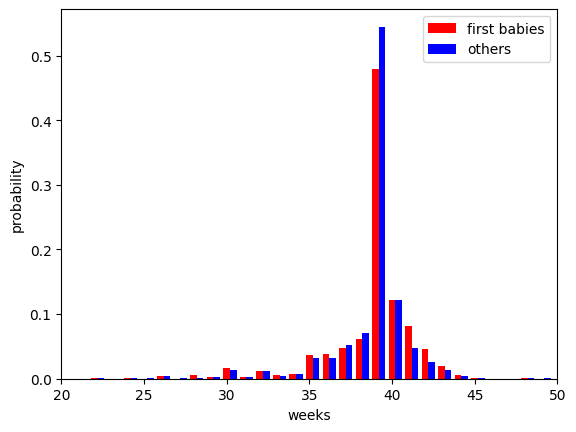

In [26]:
draw_histogram(prglen_first_babies, prglen_other_babies, pmf=True)

### Outliers

Using our knowledge of pregnancy terms, we can deduce that values for pregnancy lengths for live births under 20 are almost certainly errors, and values over 30 seem legitimate. So we truncate the data under 30 for the difference of PMF chart below (which also shows in much more detail how the probability of first baby arrival changes over weeks 30 - 50.

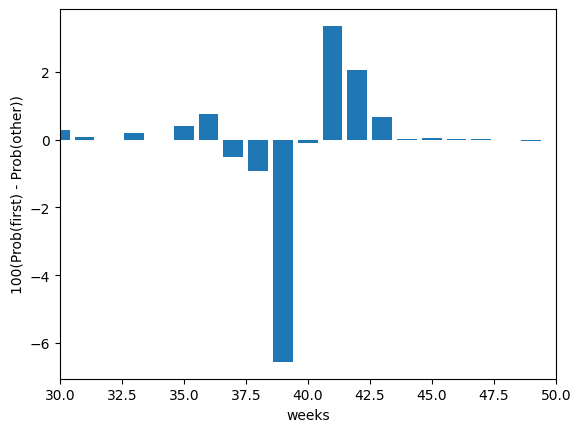

In [27]:
pmf_first_babies = np.histogram(np.array(first_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)
pmf_other_babies = np.histogram(np.array(other_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)

prob_first_babies = pmf_first_babies[0]
prob_other_babies = pmf_other_babies[0]
prob_diff = 100.0 * (prob_first_babies - prob_other_babies)

plt.bar(np.arange(nbr_bins), prob_diff)
plt.xlim([30, 50])
plt.xlabel("weeks")
plt.ylabel("100(Prob(first) - Prob(other))")
plt.show()

### Relative Risk

Assume a baby is early if born in week 37 or earlier, on time if born in weeks 38, 39 or 40, and late if born in week 41 or later.

The relative risk is a ratio of probabilities. We compute the relative risk of a first baby being born early as the probability of a first baby being born early over the probability of a non-first baby being born early. Using this, we see that the relative risk for a first baby being born early is about 1.1, but the relative risk for a first baby being born late is 1.7.

In [28]:
# compute PMFs for each distribution
pmf_first_babies = np.histogram(np.array(first_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)
pmf_other_babies = np.histogram(np.array(other_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)

# compute ranges of each distribution
hist_bins = pmf_first_babies[1][:-1]
born_early = np.where(hist_bins <= 37.0)[0]
born_late = np.where(hist_bins >= 41.0)

# sum of probability mass in these ranges is the prob of happening
p_first_early = np.sum(pmf_first_babies[0][born_early])
p_first_late = np.sum(pmf_first_babies[0][born_late])
p_other_early = np.sum(pmf_other_babies[0][born_early])
p_other_late = np.sum(pmf_other_babies[0][born_late])

print("probability first baby born early: %.3f" % (p_first_early))
print("probability other baby born early: %.3f" % (p_other_early))
print("relative risk for first baby born early = %.3f" % (p_first_early / p_other_early))
print()
print("probability first baby born late: %.3f" % (p_first_late))
print("probability other baby born late: %.3f" % (p_other_late))
print("relative risk for first baby born late = %.3f" % (p_first_late / p_other_late))

probability first baby born early: 0.182
probability other baby born early: 0.168
relative risk for first baby born early = 1.084

probability first baby born late: 0.155
probability other baby born late: 0.094
relative risk for first baby born late = 1.658


### Conditional Probability

Given that someone you know is pregnant, and it is the beginning of week 39. What is the chance that the baby will be born this week? How much does the answer change if its the first baby?

This is a question in Survival Analysis, ie, computing the remaining lifetime of something given its distribution. The idea is to generate a fake distribution using the PMF truncated at the specified age, then build a PMF out of the fake distribution.

In [29]:
def remaining_lifetime(pmf, age):
    """ Takes PMF and age and returns PMF of remaining lifetime """
    ages = pmf[1][:-1]
    idxs = np.where(ages >= age)[0]
    r_probs = pmf[0][idxs]
    r_ages = ages[idxs]
    # generate a fake population with r_probs and r_ages
    fake_pop_size = 1000
    fake_pop = []
    for i in range(r_ages.shape[0]):
        num_aged = int(r_probs[i] * fake_pop_size)
        for j in range(num_aged):
            fake_pop.append(r_ages[i])
    # create a histogram and return
    r_nbins = r_ages.shape[0]
    r_range = (np.min(r_ages), np.max(r_ages))
    return np.histogram(np.array(fake_pop), bins=r_nbins, range=r_range, density=True)

pmf_live_births = np.histogram(np.array(live_births["prglength"]), 
                               bins=nbr_bins, range=bin_range, density=True)
pmf_all_remaining = remaining_lifetime(pmf_live_births, 39)
print("probability of baby being born in week 39 = %.3f" % pmf_all_remaining[0][0])

probability of baby being born in week 39 = 0.747


<BarContainer object of 11 artists>

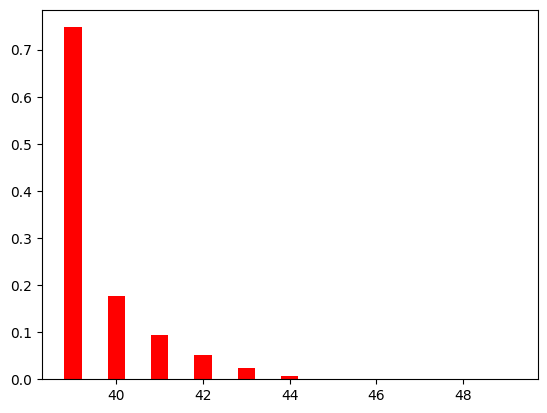

In [31]:
width = 0.4
#index = np.arange(len(r_ages))
plt.bar([39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.], pmf_all_remaining[0], width, color="red", label="first babies")

In [32]:
# week 39
pmf_live_births = np.histogram(np.array(live_births["prglength"]), 
                               bins=nbr_bins, density=True)
pmf_all_remaining = remaining_lifetime(pmf_live_births, 39)
print("probability of baby being born in week 39 = %.3f" % pmf_all_remaining[0][0])

pmf_first_babies = np.histogram(np.array(first_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)
pmf_first_remaining = remaining_lifetime(pmf_first_babies, 39)
print("probability of first baby being born in week 39 = %.3f" % pmf_first_remaining[0][0])

pmf_other_babies = np.histogram(np.array(other_babies["prglength"]), 
                                bins=nbr_bins, range=bin_range, density=True)
pmf_other_remaining = remaining_lifetime(pmf_other_babies, 39)
print("probability of other baby being born in week 39 = %.3f" % pmf_other_remaining[0][0])
print()

# week 42
pmf_all_remaining = remaining_lifetime(pmf_live_births, 42)
print("probability of baby being born in week 42 = %.3f" % pmf_all_remaining[0][0])

pmf_first_remaining = remaining_lifetime(pmf_first_babies, 42)
print("probability of first baby being born in week 42 = %.3f" % pmf_first_remaining[0][0])

pmf_other_remaining = remaining_lifetime(pmf_other_babies, 42)
print("probability of other baby being born in week 42 = %.3f" % pmf_other_remaining[0][0])

probability of baby being born in week 39 = 0.747
probability of first baby being born in week 39 = 0.701
probability of other baby being born in week 39 = 0.794

probability of baby being born in week 42 = 0.702
probability of first baby being born in week 42 = 0.740
probability of other baby being born in week 42 = 0.697


Generalizing the code further to compute the probability of a baby (first or any) baby born in week x, where x can vary from 0 to 50.

C:\Program Files\Python311\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


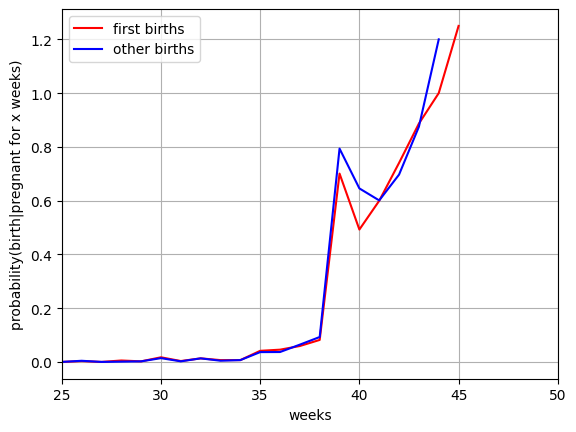

In [33]:
def cond_prob(pmf, x):
    """ Returns probability that birth will occur at week x given person 
        is pregnant at week x """
    return remaining_lifetime(pmf, x)[0][0]

first_birth_probs = []
other_birth_probs = []
for x in range(0, 49):
    first_birth_probs.append(cond_prob(pmf_first_babies, x))
    other_birth_probs.append(cond_prob(pmf_other_babies, x))

plt.plot(range(len(first_birth_probs)), first_birth_probs, color='r', label="first births")
plt.plot(range(len(first_birth_probs)), other_birth_probs, color='b', label="other births")

plt.ylabel("probability(birth|pregnant for x weeks)")
plt.xlabel("weeks")
plt.xlim([25, 50])
plt.legend(loc="best")
plt.grid()
plt.show()

The chart indicates that a first baby is less likely to be born until about week 42, after which they are more likely to be born than other babies.

## Reporting Results

The evidence clearly indicates that first babies tend to arrive later than others.